In [1]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import pydotplus
from IPython.display import Image

diabetes_df = pd.read_csv("../week_13/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state =42)
#what is an estimator?  models

rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7662337662337663

In [9]:
predictions = rf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154



In [11]:
print(rf.feature_importances_, X.columns)

[0.08427673 0.26607312 0.08633456 0.07019407 0.07375236 0.16142
 0.12708861 0.13086056] Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [ ]:
#look at the random forest documentaiton to improve the model
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


In [12]:
#XGBoost
#sudo pip install xgboost
from xgboost import XGBClassifier

#fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:35:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       100
           1       0.67      0.63      0.65        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

#ROC Curves are summaries of the trade-off between true positive and false positive rates
#ROC curves are most appropriate for balanced datasets
#precision-recall curve summarizes the trade-off between true positive rate
#and positive predictive values. These are best for imbalanced datasets
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(auc)

0.7298148148148148


Text(0, 0.5, 'True Positive Rate')

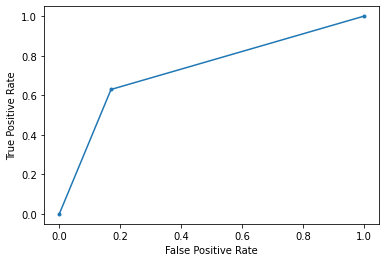

In [17]:
plt.plot(fpr, tpr, marker = '.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [18]:
#better here because data is imbalanced
from sklearn.metrics import precision_recall_curve, f1_score, auc
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

f1 = f1_score(y_test, y_pred)
print(f1)

auc = auc(recall, precision)
print(auc)

0.6476190476190475
0.713083213083213


Text(0, 0.5, 'Precision')

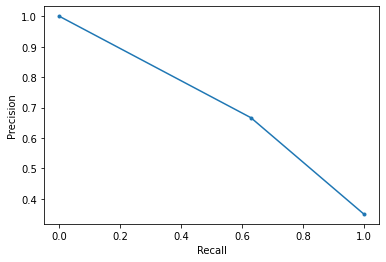

In [19]:
plt.plot(recall, precision, marker = '.')
plt.xlabel('Recall')
plt.ylabel('Precision')
